# SAI - I 실습과제 이어서.

## 다중 분류 예제

- 로이터라는 뉴스 기사 데이터셋을 이용할 것임

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
# One Hot Encoding
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i , label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [7]:
# Keras 내장함수로 One hot encoding

# one_hot_labels = to_categorical(labels)

## 모델 구성

이전 모델에서 출력 공간의 차원을 늘린 것이다.

In [8]:
from keras import models
from keras import layers

model = models.Sequential()

In [9]:
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

In [10]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy', # 이런 문제 유형에 적합한 손실 함수!
              metrics = ['accuracy'])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [13]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.5173 - accuracy: 0.5222 - val_loss: 1.6976 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.3658 - accuracy: 0.7117 - val_loss: 1.2725 - val_accuracy: 0.7300
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0085 - accuracy: 0.7897 - val_loss: 1.1111 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.7940 - accuracy: 0.8341 - val_loss: 1.0070 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6309 - accuracy: 0.8700 - val_loss: 0.9481 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4999 - accuracy: 0.8978 - val_loss: 0.8984 - val_accuracy: 0.8190
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4002 - accuracy: 0.9179 - val_loss: 0.8843 - val_accuracy: 0.8140
Epoch 8/20
16

Training 결과와 Validation 결과를 비교하는 그래프 그리는 부분은 귀찮으니까 저번에 (02-Binary_Classificatioon) 만들었던 걸 그대로 긁어 오겠음

In [18]:
import matplotlib.pyplot as plt

def make_eval_plot(history):
  history_dict = history.history
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  plt.subplot(1,2,1)
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'bo', label = 'Training Loss')
  plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
 
  plt.subplot(1,2,2)
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
  plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

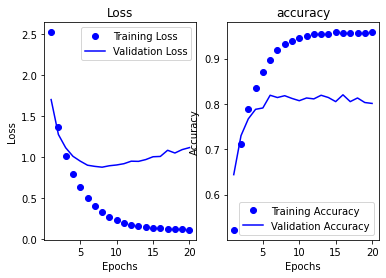

In [19]:
make_eval_plot(history)

In [20]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy', # 이런 문제 유형에 적합한 손실 함수!
              metrics = ['accuracy'])

model.fit(x_train, one_hot_train_labels, epochs = 9, batch_size = 512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
18/18 [==============================] - 1s 40ms/step - loss: 2.4771 - accuracy: 0.5494
Epoch 2/9
18/18 [==============================] - 1s 39ms/step - loss: 1.3194 - accuracy: 0.7188
Epoch 3/9
18/18 [==============================] - 1s 40ms/step - loss: 0.9617 - accuracy: 0.7990
Epoch 4/9
18/18 [==============================] - 1s 40ms/step - loss: 0.7507 - accuracy: 0.8432
Epoch 5/9
18/18 [==============================] - 1s 39ms/step - loss: 0.5822 - accuracy: 0.8818
Epoch 6/9
18/18 [==============================] - 1s 39ms/step - loss: 0.4653 - accuracy: 0.9038
Epoch 7/9
18/18 [==============================] - 1s 40ms/step - loss: 0.3664 - accuracy: 0.9220
Epoch 8/9
18/18 [==============================] - 1s 40ms/step - loss: 0.3040 - accuracy: 0.9342
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9440 - accuracy: 0.7996


In [21]:
results

[0.943965494632721, 0.7996438145637512]

모델을 이용해서 예측 수행하기..

In [22]:
predictions = model.predict(x_test)

In [24]:
print(predictions[0].shape)
print(np.sum(predictions[0]))

(46,)
0.99999994


46 개의 값을 가지면서, 이 모든 것을 다 합치면 1이 된다. 즉 확률임.

In [25]:
np.argmax(predictions[0])

3

그래서 이렇게 가장 높은 값을 갖는 label이 예측하는 클래스이다.

## Sparse Categorical Crossentropy

- 레이블을 인코딩할 때 One Hot Encoding 말고 그냥 단순히 정수 텐서로 변환할 땐, 이 손실함수를 써주어야 한다.
- 기존의 Categorical Cross Entropy와 다른 점은 없다.

In [ ]:
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)

# model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])


## 병목 현상 
히든 유닛의 개수가 마지막 출력 차원보다 많이 작으면 정보의 병목 현상이 나타난다.

원인은 정보를 46차원으로 복원하는 데 써야 하는 정보를 저차원 공간으로 압축한 것에 있다. 차원이 너무 낮아 정보를 다 담기에 부족했던 것.

In [26]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(4, activation= 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy', # 이런 문제 유형에 적합한 손실 함수!
              metrics = ['accuracy'])

model.fit(x_train, one_hot_train_labels, epochs = 9, batch_size = 128)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
71/71 [==============================] - 1s 15ms/step - loss: 2.8218 - accuracy: 0.3935
Epoch 2/9
71/71 [==============================] - 1s 16ms/step - loss: 1.5717 - accuracy: 0.6345
Epoch 3/9
71/71 [==============================] - 1s 15ms/step - loss: 1.2544 - accuracy: 0.7002
Epoch 4/9
71/71 [==============================] - 1s 15ms/step - loss: 1.0886 - accuracy: 0.7360
Epoch 5/9
71/71 [==============================] - 1s 15ms/step - loss: 0.9752 - accuracy: 0.7536
Epoch 6/9
71/71 [==============================] - 1s 15ms/step - loss: 0.8870 - accuracy: 0.7674
Epoch 7/9
71/71 [==============================] - 1s 15ms/step - loss: 0.8154 - accuracy: 0.7816
Epoch 8/9
71/71 [==============================] - 1s 15ms/step - loss: 0.7562 - accuracy: 0.7918
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 1.3633 - accuracy: 0.7128


정확도가 71%로, 기존의 79%보다 많이 낮아졌다는 것을 볼 수 있다.

## 추가 실험
- 더 크거나 작은 층 사용해보기
- 은닉층 개수 바꾸어보기


-> 피곤해서 스킵..